In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/labevents_laboratory.csv'

# Load the CSV into a DataFrame
lab = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(lab.head())

   subject_id            charttime  itemid  valuenum
0    10002428  2154-08-12 12:10:00   51200       1.1
1    10002428  2154-08-12 12:10:00   51221      35.2
2    10002428  2154-08-12 12:10:00   51222      11.8
3    10002428  2154-08-12 12:10:00   51256      68.5
4    10002428  2154-08-12 12:10:00   51265     344.0


In [14]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845809 entries, 0 to 4845808
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  int64  
 1   charttime   object 
 2   itemid      int64  
 3   valuenum    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 147.9+ MB


In [15]:
# Convert charttime to an datetime
lab['charttime'] = lab['charttime'].astype('datetime64[ns]')
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845809 entries, 0 to 4845808
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   subject_id  int64         
 1   charttime   datetime64[ns]
 2   itemid      int64         
 3   valuenum    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.9 MB


In [16]:
# Count the number of unique subject_ids / patients in this dataframe
print(f'Number of patients: {lab["subject_id"].nunique()}')

Number of patients: 5831


In [17]:
# Load the d_items CSV
d_labitems_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/hosp/d_labitems_2.csv'
d_labitems = pd.read_csv(d_labitems_path)

# Merge the label column into the lab dataframe using itemid
lab = lab.merge(
    d_labitems[['itemid', 'label']],  # Only keep necessary columns
    on='itemid',
    how='left'  
)

lab.head()

,subject_id,charttime,itemid,valuenum,label
0,10002428,2154-08-12 12:10:00,51200,1.1,Eosinophils
1,10002428,2154-08-12 12:10:00,51221,35.2,Hematocrit
2,10002428,2154-08-12 12:10:00,51222,11.8,Hemoglobin
3,10002428,2154-08-12 12:10:00,51256,68.5,Neutrophils
4,10002428,2154-08-12 12:10:00,51265,344.0,Platelet Count


In [18]:
lab.shape

(4845809, 5)

In [19]:
# Group by itemid and count nulls in 'valuenum' column only
null_counts = lab.groupby('itemid')['valuenum'].apply(lambda x: x.isnull().sum()).reset_index(name='null_valuenum')

null_counts

,itemid,null_valuenum
0,50861,641
1,50862,51
2,50863,14
3,50885,761
4,50889,298
5,50893,34
6,50909,2
7,50910,9
8,50912,81
9,50915,105


In [20]:
# Load the d_items CSV
d_labitems_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/hosp/d_labitems_2.csv'
d_labitems = pd.read_csv(d_labitems_path)

# Merge the label column into the ventilation dataframe using itemid
null_counts = null_counts.merge(
    d_labitems[['itemid', 'label']],  
    on='itemid',
    how='left'  
)

null_counts

,itemid,null_valuenum,label
0,50861,641,Alanine Aminotransferase (ALT)
1,50862,51,Albumin
2,50863,14,Alkaline Phosphatase
3,50885,761,"Bilirubin, Total"
4,50889,298,C-Reactive Protein
5,50893,34,"Calcium, Total"
6,50909,2,Cortisol
7,50910,9,Creatine Kinase (CK)
8,50912,81,Creatinine
9,50915,105,D-Dimer


In [21]:
# Group by itemid
grouped = lab.groupby('itemid')

# Define the frequency function
def avg_obs_per_20_hours(group):
    n_obs = len(group)
    time_span_hours = (group['charttime'].max() - group['charttime'].min()).total_seconds() / 3600
    return (n_obs / time_span_hours * 20) if time_span_hours > 0 else float('nan')

# Apply the function to the cleaned dataframe
avg_freq_df = grouped.apply(avg_obs_per_20_hours).reset_index(name='avg_obs_per_20_hours')

/var/folders/ks/xzsx5z1n0zv653847sbsxy7r0000gp/T/ipykernel_62341/1315467498.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_freq_df = grouped.apply(avg_obs_per_20_hours).reset_index(name='avg_obs_per_20_hours')


In [22]:
# Load the d_items CSV
d_labitems_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/hosp/d_labitems_2.csv'
d_labitems = pd.read_csv(d_labitems_path)

# Merge the label column into the ventilation dataframe using itemid
avg_freq_df = avg_freq_df.merge(
    d_labitems[['itemid', 'label']],  # Only keep necessary columns
    on='itemid',
    how='left'  
)

avg_freq_df

,itemid,avg_obs_per_20_hours,label
0,50861,2.792393,Alanine Aminotransferase (ALT)
1,50862,1.626409,Albumin
2,50863,2.655715,Alkaline Phosphatase
3,50885,2.724206,"Bilirubin, Total"
4,50889,0.132280,C-Reactive Protein
5,50893,6.182374,"Calcium, Total"
6,50909,0.077475,Cortisol
7,50910,0.695625,Creatine Kinase (CK)
8,50912,7.597898,Creatinine
9,50915,0.026269,D-Dimer


In [23]:
# Dropping features that are measured < 1 per 20-hour period, apart from CRP

# drop specific itemids
itemids_to_drop = [50909, 50910, 50915, 50924, 50994, 51003, 51196, 51300]
lab2 = lab[~lab['itemid'].isin(itemids_to_drop)].copy()

In [24]:
lab2.shape

(4760659, 5)

In [25]:
# Check for outliers in the dataframe

summary_stats = lab2.groupby('itemid')['valuenum'].agg(
    min_value='min',
    max_value='max',
    median_value='median'
).reset_index()

# Load the d_items CSV
d_labitems_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/hosp/d_labitems_2.csv'
d_labitems = pd.read_csv(d_labitems_path)

# Merge the label column into the ventilation dataframe using itemid
summary_stats = summary_stats.merge(
    d_labitems[['itemid', 'label']],  # Only keep necessary columns
    on='itemid',
    how='left' 
)

summary_stats

,itemid,min_value,max_value,median_value,label
0,50861,0.0,25460.0,29.00,Alanine Aminotransferase (ALT)
1,50862,0.3,6.8,3.30,Albumin
2,50863,0.0,4616.0,107.00,Alkaline Phosphatase
3,50885,0.0,87.2,0.70,"Bilirubin, Total"
4,50889,0.1,327.1,25.45,C-Reactive Protein
5,50893,0.0,59.0,8.60,"Calcium, Total"
6,50912,0.0,27.5,1.10,Creatinine
7,50960,0.0,58.0,2.00,Magnesium
8,50970,0.0,58.0,3.40,Phosphate
9,50971,1.0,13.1,4.10,Potassium


In [35]:
# Define valid ranges for specific itemids
valid_ranges = {
    50861: (0, 500),
    50862: (0, 7),
    50863: (10, 500),
    50885: (0, 3),
    50889: (0, 350),
    50893: (6, 20),
    50912: (0.3, 8),
    50960: (0.5, 4),
    50970: (1.5, 6.5),
    50971: (2.5, 8),
    50983: (105, 180),
    51006: (2, 200),
    51200: (0, 5),
    51221: (15, 60),
    51222: (3, 21),
    51237: (0.5, 10),
    51256: (0, 70),
    51265: (0, 1000),
    51274: (8, 50),
    51275: (6, 150),
    51301: (0, 70)
}

to_filter = lab2[lab2['itemid'].isin(valid_ranges.keys())].copy()

# Apply physiological range filtering to the filtered subset
def in_valid_range(row):
    low, high = valid_ranges[row['itemid']]
    return low <= row['valuenum'] <= high

lab2 = to_filter[to_filter.apply(in_valid_range, axis=1)]

In [36]:
lab2.shape

(4515559, 5)

In [37]:
lab2.head()

,subject_id,charttime,itemid,valuenum,label
0,10002428,2154-08-12 12:10:00,51200,1.1,Eosinophils
1,10002428,2154-08-12 12:10:00,51221,35.2,Hematocrit
2,10002428,2154-08-12 12:10:00,51222,11.8,Hemoglobin
4,10002428,2154-08-12 12:10:00,51265,344.0,Platelet Count
5,10002428,2154-08-12 12:10:00,51301,7.8,White Blood Cells


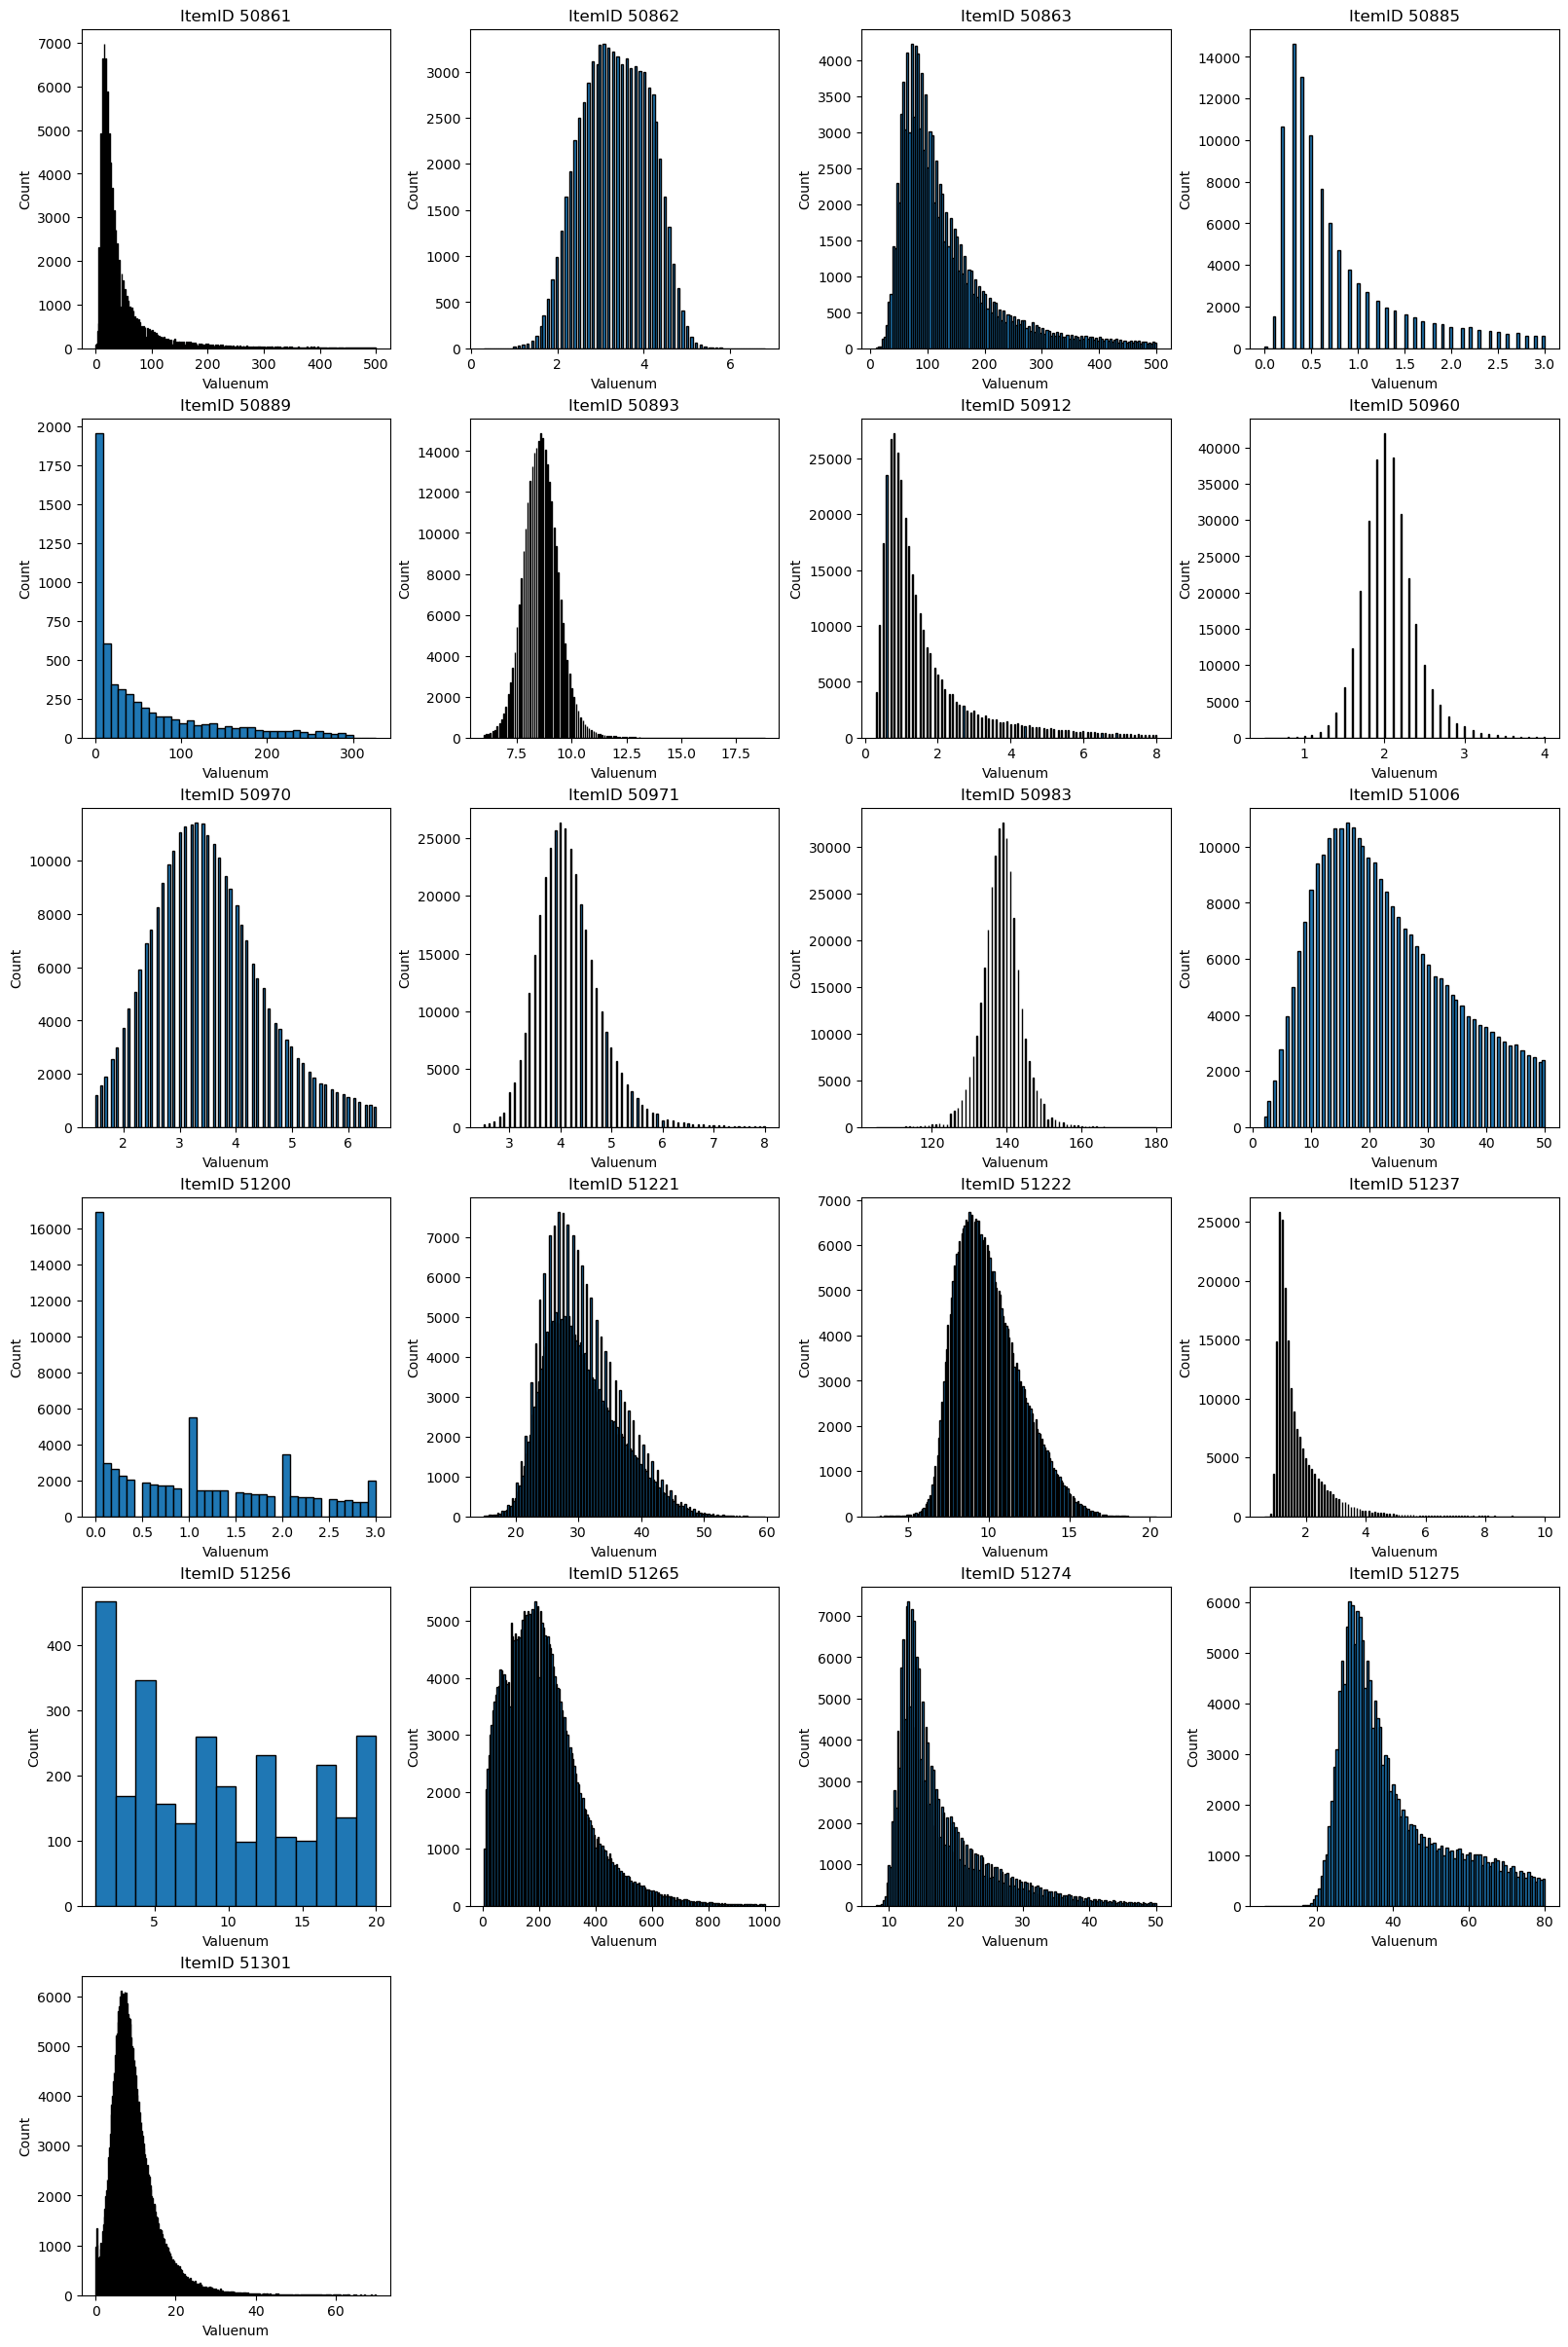

In [38]:
# Get unique itemids from lab2
itemids = lab2['itemid'].unique()

# Filter NaNs in valuenum
filtered = lab2[lab2['valuenum'].notna() & lab2['itemid'].isin(itemids)]

# Group by itemid
grouped = filtered.groupby('itemid')['valuenum']

# Keep only non-empty groups
data_dict = {itemid: group for itemid, group in grouped if not group.empty}

# Plot configuration
n = len(data_dict)
cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows), constrained_layout=True)
axes = axes.flatten()

# Plot histograms
for ax, (itemid, data) in zip(axes, data_dict.items()):
    ax.hist(data, bins='auto', edgecolor='black')
    ax.set_title(f'ItemID {itemid}')
    ax.set_xlabel('Valuenum')
    ax.set_ylabel('Count')

# Hide any unused subplots
for ax in axes[n:]:
    ax.set_visible(False)

plt.show()

In [39]:
# Check for outliers in the dataframe

summary_stats = lab2.groupby('itemid')['valuenum'].agg(
    min_value='min',
    max_value='max',
    median_value='median'
).reset_index()

# Load the d_items CSV
d_labitems_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/hosp/d_labitems_2.csv'
d_labitems = pd.read_csv(d_labitems_path)

# Merge the label column into the ventilation dataframe using itemid
summary_stats = summary_stats.merge(
    d_labitems[['itemid', 'label']],  # Only keep necessary columns
    on='itemid',
    how='left' 
)

summary_stats

,itemid,min_value,max_value,median_value,label
0,50861,0.0,500.0,28.00,Alanine Aminotransferase (ALT)
1,50862,0.3,6.8,3.30,Albumin
2,50863,10.0,500.0,104.00,Alkaline Phosphatase
3,50885,0.0,3.0,0.50,"Bilirubin, Total"
4,50889,0.1,327.1,25.45,C-Reactive Protein
5,50893,6.0,18.8,8.60,"Calcium, Total"
6,50912,0.3,8.0,1.10,Creatinine
7,50960,0.5,4.0,2.00,Magnesium
8,50970,1.5,6.5,3.40,Phosphate
9,50971,2.5,8.0,4.10,Potassium


In [40]:
lab3 = lab2.copy()

In [41]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/postwean.csv'

# Load the CSV into a DataFrame
outcomes = pd.read_csv(file_path)

outcomes = outcomes[['subject_id', 'stay_id', 'ventilation_time', 'ext_success']]
outcomes = outcomes.drop_duplicates()
lab3 = pd.merge(
    lab3,
    outcomes[['subject_id', 'ext_success']],
    on=['subject_id'],
    how='inner'  # 
)

In [42]:
lab3.head()

,subject_id,charttime,itemid,valuenum,label,ext_success
0,10002428,2154-08-12 12:10:00,51200,1.1,Eosinophils,1
1,10002428,2154-08-12 12:10:00,51221,35.2,Hematocrit,1
2,10002428,2154-08-12 12:10:00,51222,11.8,Hemoglobin,1
3,10002428,2154-08-12 12:10:00,51265,344.0,Platelet Count,1
4,10002428,2154-08-12 12:10:00,51301,7.8,White Blood Cells,1


In [44]:
# Group by subject_id and itemid, count number of samples
group_counts = (
    lab3
    .groupby(['subject_id', 'itemid'])
    .size()
    .reset_index(name='sample_count')
)

# Compute average sample count per itemid
avg_samples = (
    group_counts
    .groupby('itemid')['sample_count']
    .mean()
    .reset_index(name='avg_samples_per_subject_stay')
)

# If 'label' exists and is associated uniquely with itemid, merge it in
if 'label' in lab3.columns:
    itemid_label_map = lab3[['itemid', 'label']].drop_duplicates()
    avg_samples = avg_samples.merge(itemid_label_map, on='itemid', how='left')

# Reorder columns if needed
avg_samples = avg_samples[['itemid', 'label', 'avg_samples_per_subject_stay']] if 'label' in avg_samples.columns else avg_samples

avg_samples

,itemid,label,avg_samples_per_subject_stay
0,50861,Alanine Aminotransferase (ALT),25.411346
1,50862,Albumin,15.671525
2,50863,Alkaline Phosphatase,24.257970
3,50885,"Bilirubin, Total",20.982700
4,50889,C-Reactive Protein,4.170395
5,50893,"Calcium, Total",55.456775
6,50912,Creatinine,66.960535
7,50960,Magnesium,57.700343
8,50970,Phosphate,52.493734
9,50971,Potassium,69.629395


In [45]:
import os

lab3.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/lab_cleaned_combi.csv", index=False)